In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
og = pd.read_csv('music_cleanflag.csv')
og.head()

,Unnamed: 0,X,position,track_name,artist,genre,streams,year,month,day,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_mins,flag20
0,1,1,1,Starboy,The Weeknd,r&b,3135625,2017,1,1,...,0.2820,0.16500,0.000003,0.134,0.535,186.054,230453,4,3M 50.453S,1
1,2,2,2,Closer,The Chainsmokers,edm,3015525,2017,1,1,...,0.0338,0.41400,0.000000,0.111,0.661,95.010,244960,4,4M 4.96000000000001S,1
2,3,3,3,Let Me Love You,DJ Snake,edm,2545384,2017,1,1,...,0.0576,0.07840,0.000010,0.122,0.142,199.864,205947,4,3M 25.947S,1
3,4,4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,edm,2356604,2017,1,1,...,0.0523,0.40600,0.000000,0.180,0.742,101.965,251088,4,4M 11.088S,1
4,5,5,5,One Dance,Drake,hip hop,2259887,2017,1,1,...,0.0532,0.00784,0.004230,0.351,0.371,103.989,173987,4,2M 53.987S,1


In [12]:
print("pandas df columns: {}".format(og.columns))

pandas df columns: Index(['Unnamed: 0', 'X', 'position', 'track_name', 'artist', 'genre',
       'streams', 'year', 'month', 'day', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'duration_mins', 'flag20'],
      dtype='object')


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

np.random.seed(0)

numeric_features = ['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_features = ['genre', 'artist']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [14]:
len(pd.unique(og['artist']))

394

In [15]:
#data = og.drop('codeFlag', axis = 1)
data = og[['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'genre', 'artist']]
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,artist
0,0.681,0.594,7,-7.028,1,0.2820,0.16500,0.000003,0.134,0.535,186.054,r&b,The Weeknd
1,0.748,0.524,8,-5.599,1,0.0338,0.41400,0.000000,0.111,0.661,95.010,edm,The Chainsmokers
2,0.476,0.718,8,-5.309,1,0.0576,0.07840,0.000010,0.122,0.142,199.864,edm,DJ Snake
3,0.720,0.763,9,-4.068,0,0.0523,0.40600,0.000000,0.180,0.742,101.965,edm,Clean Bandit
4,0.791,0.619,1,-5.886,1,0.0532,0.00784,0.004230,0.351,0.371,103.989,hip hop,Drake


In [16]:
target = og['flag20']

In [17]:
target = target.astype('float64')

In [18]:
target.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: flag20, dtype: float64

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
model score: 0.831
Feature ranking:
1. feature 9 (0.121620)
2. feature 1 (0.121018)
3. feature 0 (0.097244)
4. feature 8 (0.076734)
5. feature 3 (0.067160)
6. feature 6 (0.063494)
7. feature 10 (0.063377)
8. feature 2 (0.052719)
9. feature 5 (0.042780)
10. feature 268 (0.029462)
11. feature 7 (0.025080)
12. feature 251 (0.024705)
13. feature 101 (0.021533)
[[10991   684]
 [ 1764  1081]]
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     11675
         1.0       0.61      0.38      0.47      2845

    accuracy     

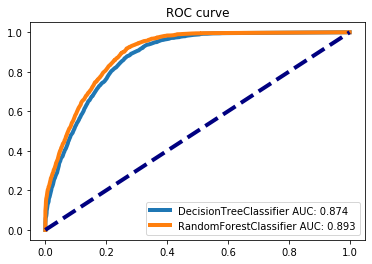

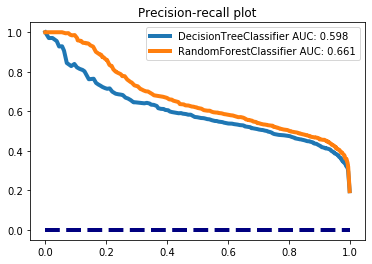

In [39]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
classifiers = [
    #LogisticRegression(),
    DecisionTreeClassifier(min_samples_leaf = 100),
    RandomForestClassifier(),
    #GaussianNB()
    #MLPClassifier()
    #KNeighborsClassifier(),
]

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('clf', None)])

# [introduction pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
# [separate figures](https://matplotlib.org/tutorials/intermediate/artists.html)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

roc_things = []
precision_recall_things = []

for classifier in classifiers:
    clf.set_params(clf=classifier).fit(X_train, y_train)
    classifier_name = classifier.__class__.__name__
    print(str(classifier))
    print("model score: %.3f" % clf.score(X_test, y_test))
    
    
    importances = classifier.feature_importances_
    indices = np.argsort(importances)[::-1]
    print("Feature ranking:")
    for f in range(X_test.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
    
    y_score = clf.predict_proba(X_test)[:,1]
    
    y_pred = clf.predict(X_test)
    
    roc_auc = roc_auc_score(y_test, y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_things.append((fpr, tpr, '{} AUC: {:.3f}'.format(classifier_name, roc_auc)))
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    pr_auc = auc(recall, precision)
    precision_recall_things.append((recall, precision, thresholds, '{} AUC: {:.3f}'.format(classifier_name, pr_auc)))
    #plot_precision_recall_curve(clf, X_test, y_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    
    print('average precision score: {:.3f}'.format(average_precision_score(y_test, y_score)))
    print('roc_auc_score: {:.3f}'.format(roc_auc))
    print('precision-recall AUC: {:.3f}'.format(pr_auc))
    print()

roc_plt = plt.figure()
lw = 4
for roc_thing in roc_things:
    fpr, tpr, label = roc_thing
    plt.plot(fpr, tpr, lw=lw, label=label)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # dadgum no-skill line
plt.legend()
plt.title('ROC curve')
          
pr_plt = plt.figure()
for pr_thing in precision_recall_things:
    recall, precision, _, label = pr_thing
    plt.plot(recall, precision, lw=lw, label=label)
ratio = y_test[y_test].shape[0] / y_test.shape[0]
plt.hlines(y=0, xmin=0, xmax=1, color='navy', lw=lw, linestyle='--') # dadgum no-skill line
plt.title('Precision-recall plot')
plt.legend()   